# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

### Central Limit Theorem 

The Central Limit Theorem states that the sampling distribution of the sampling means approaches a normal distribution as the sample size gets larger — no matter what the shape of the population distribution. This fact holds especially true for sample sizes over 30. All this is saying is that as you take more samples, especially large ones, your graph of the sample means will look more like a normal distribution.


In [24]:
import pandas as pd

df = pd.read_csv('data/human_body_temperature.csv')

### 1: Is the distribution of body temperatures normal? 

In [25]:
import numpy as np

In [26]:
df.head(10)

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0
5,99.2,M,83.0
6,98.0,M,71.0
7,98.8,M,78.0
8,98.4,F,84.0
9,98.6,F,86.0


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
temperature    130 non-null float64
gender         130 non-null object
heart_rate     130 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB


In [28]:
mean = np.mean(df['temperature'])
std = np.std(df['temperature'])
print('Mean is: ', mean, 'Standard Deviation is: ', std )

Mean is:  98.24923076923078 Standard Deviation is:  0.7303577789050377


In [45]:
sample1 = np.random.normal(mean, std, 100000)
sample2 = np.random.normal(mean, std, 130)

In [46]:
def ecdf(data):
      return np.sort(data), np.arange(1, len(data) + 1) / len(data)

In [47]:
x, y = ecdf(df['temperature'])

In [48]:
x_theor, y_theor = ecdf(sample1)

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
sns.set()

In [51]:
_ = plt.plot(x_theor, y_theor)

In [52]:
_ = plt.plot(x, y, marker='.', linestyle='none')

In [53]:
_ = plt.xlabel('body temperature (fahrenheit)')

In [54]:
plt.ylabel('CDF')

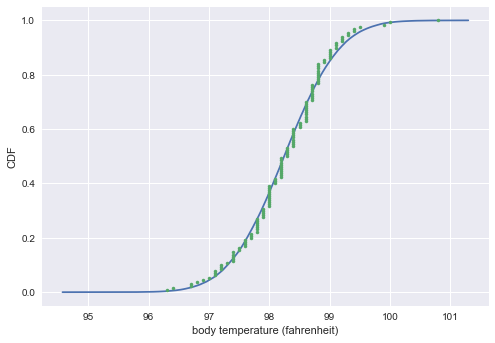

In [55]:
plt.show()

In [60]:
_ = plt.hist(df['temperature'], bins = 12, histtype='step', color='red')
_ = plt.hist(sample2, bins=12, histtype='step', color='blue')

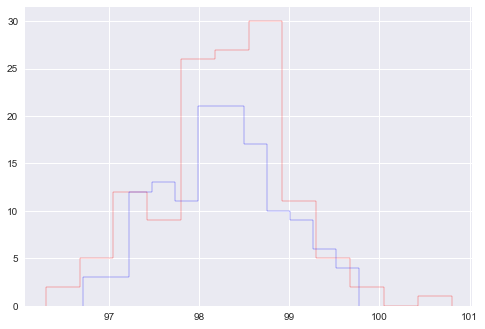

In [61]:
plt.show()

In [65]:
np.sqrt(100000)

316.22776601683796

In [66]:
_ = plt.hist(sample1, bins = 310, histtype='step', color = 'green')

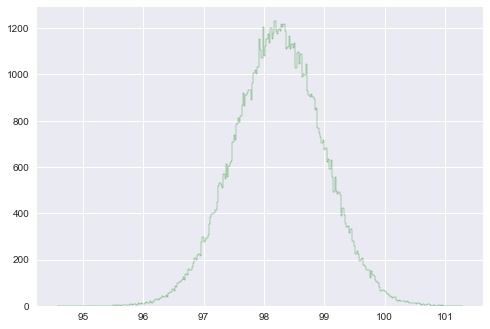

In [67]:
plt.show()

### 2: Is the sample size large? Are the observations independent?

The sample size is significantly large given that is significantly larger than 30. The observations are independent, because one persons body temperature does not impact another person's body temperature.

### 3: Is the true population mean really 98.6 degrees F?

In [69]:
#Null Hypothesis: 98.6 degrees is the true population mean
#Alt Hypothesis: 98.6 degrees is not the true population mean